In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
mcdonalds_data = pd.read_csv("/content/mcdonalds.csv")

In [3]:
#print 1st five rows of mcdonalds data
mcdonalds_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
#checking shape
mcdonalds_data.shape

(1453, 15)

In [5]:
#checking information
mcdonalds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
#checking null values
mcdonalds_data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
#checking duplicate values
mcdonalds_data.duplicated().sum()

22

In [8]:
#dropping the duplicates valus
mcdonalds_data.drop_duplicates(inplace=True)

In [9]:
mcdonalds_data.duplicated().sum()

0

In [10]:
mcdonalds_data.shape

(1431, 15)

In [11]:
#summary statistics of the numerical columns
mcdonalds_data.describe()

,Age
count,1431.000000
mean,44.656184
std,14.199400
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [12]:
#checking columns
mcdonalds_data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

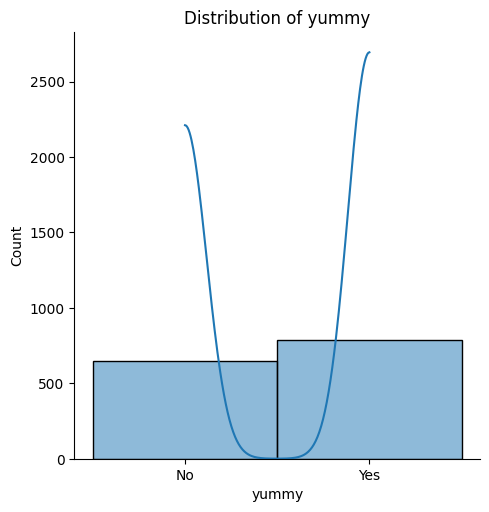

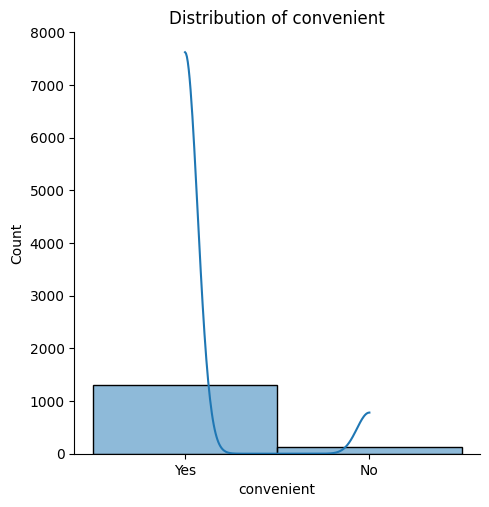

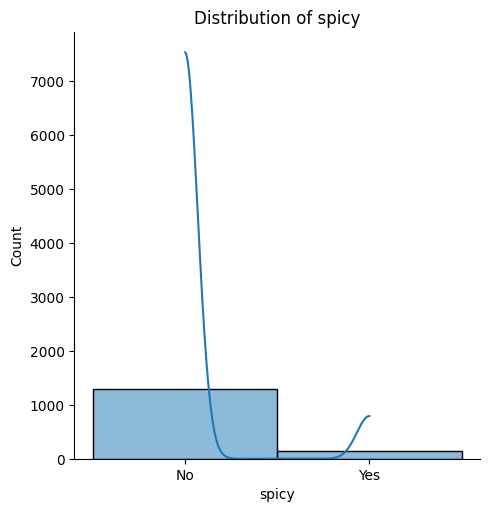

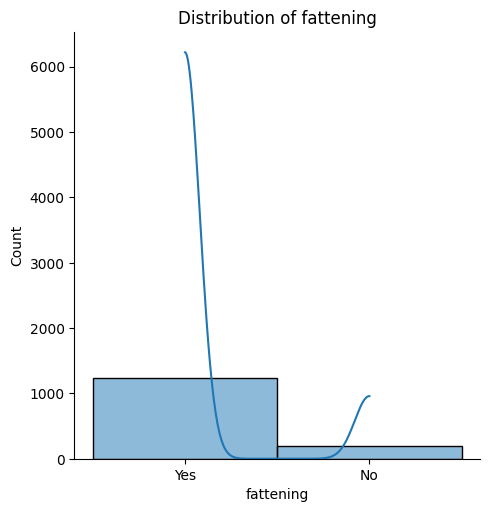

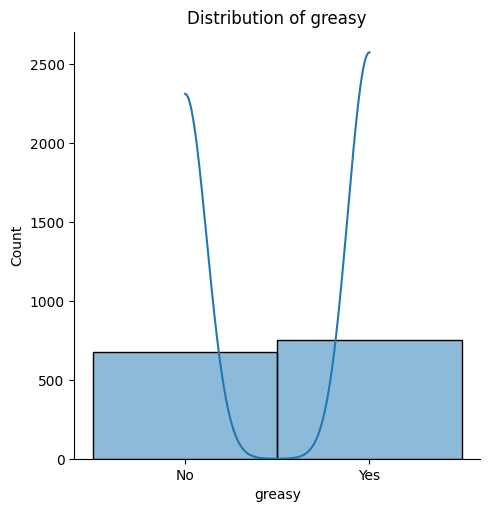

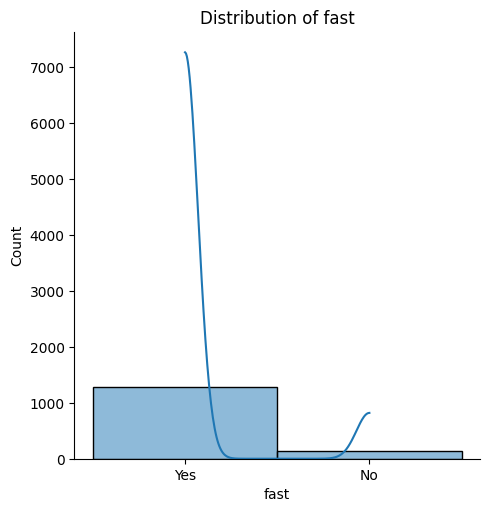

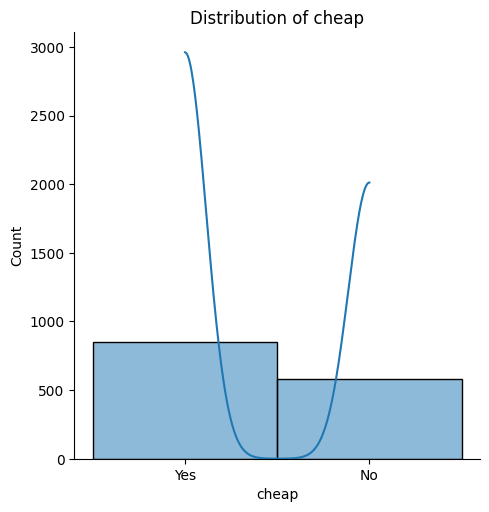

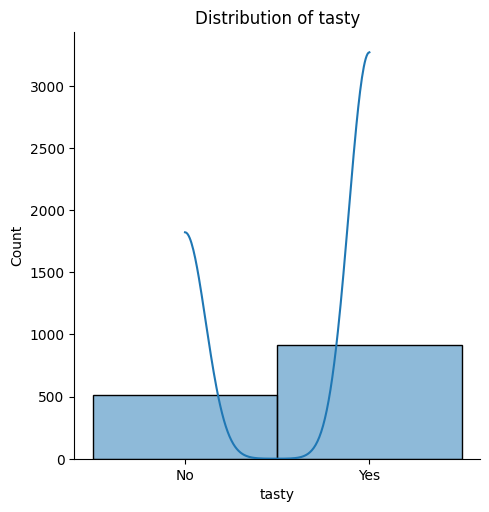

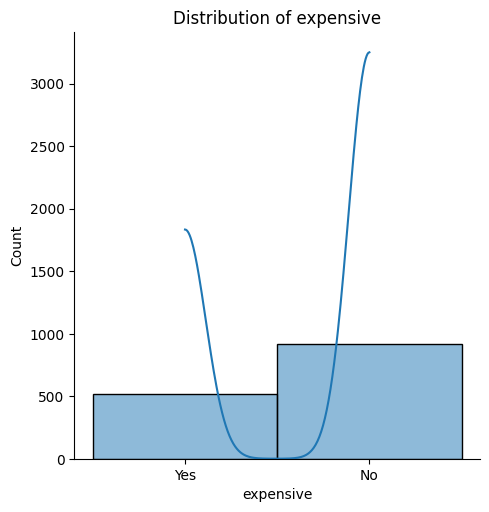

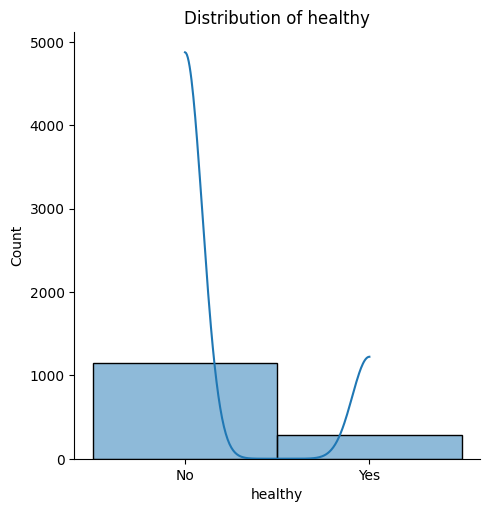

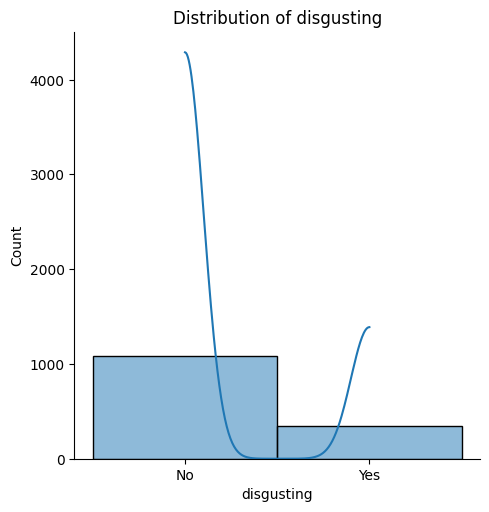

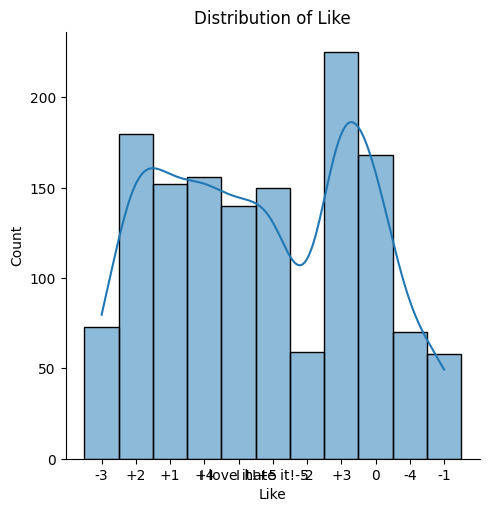

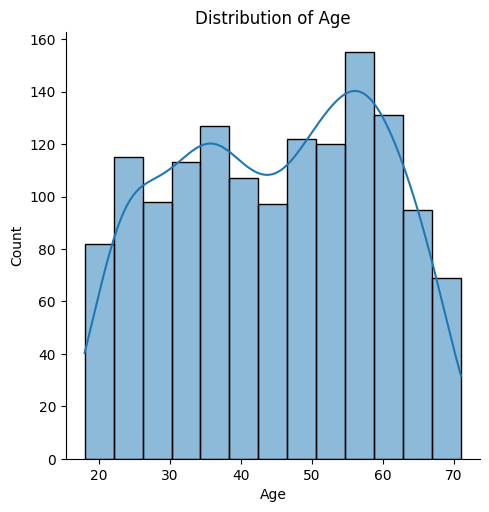

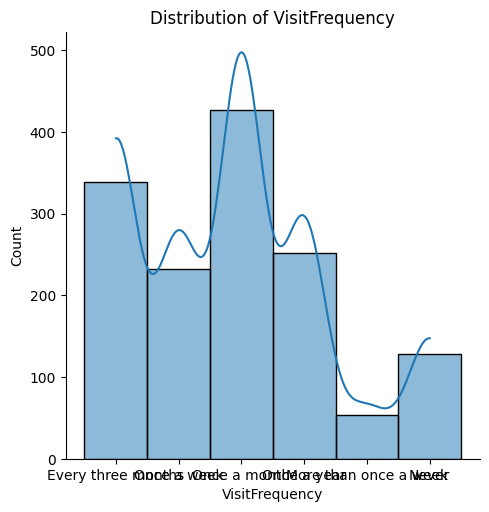

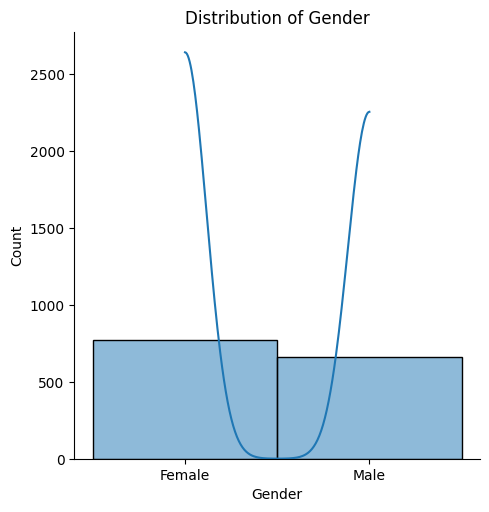

In [13]:
#loop through each column and create a distribution plot
for column in mcdonalds_data.columns:
    sns.displot(data = mcdonalds_data, x = column, kde = True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [14]:
#checking gender values
mcdonalds_data["Gender"].value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

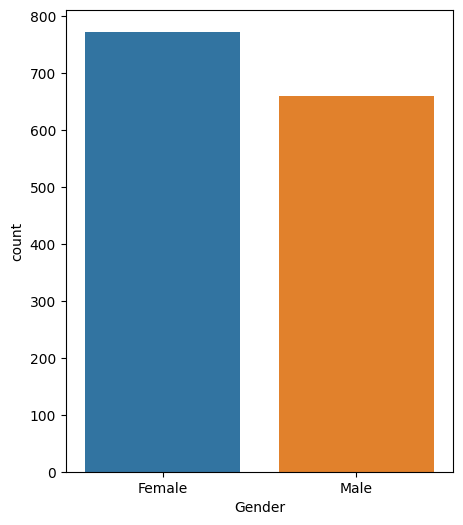

In [15]:
#plotting the Genders
plt.figure(figsize = (5,6))
sns.countplot(x="Gender",data = mcdonalds_data)

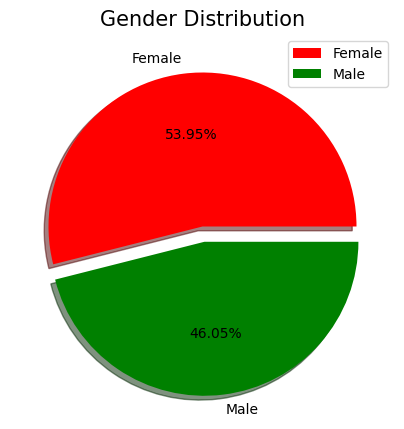

In [16]:
#customer segmentation based on Gender

gender_labels = ["Female", "Male"]
gender_sizes = mcdonalds_data["Gender"].value_counts()
gender_colors = ["red", "green"]
gender_explode = [0, 0.1]

plt.figure(figsize=(5, 5))

#pie chart for Gender
plt.pie(gender_sizes, colors = gender_colors, explode = gender_explode, labels = gender_labels, shadow = True, autopct = "%.2f%%")
plt.title("Gender Distribution", fontsize = 15)
plt.axis("off")
plt.legend()
plt.show()

In [17]:
#checking VisitFrequency values
mcdonalds_data["VisitFrequency"].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Every three months'),
  Text(1, 0, 'Once a week'),
  Text(2, 0, 'Once a month'),
  Text(3, 0, 'Once a year'),
  Text(4, 0, 'More than once a week'),
  Text(5, 0, 'Never')])

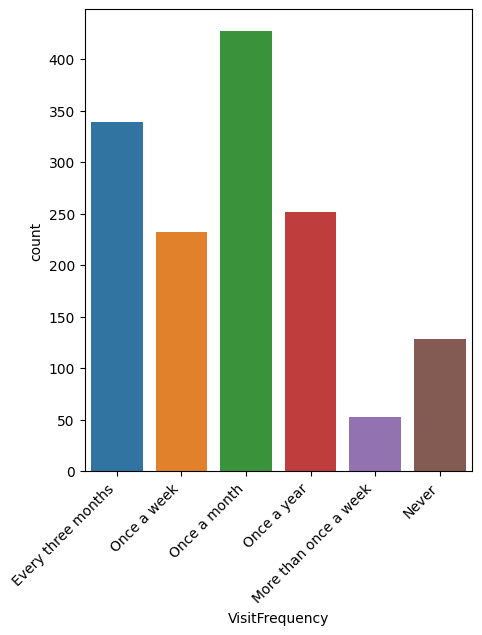

In [18]:
#plotting the VisitFrequency values
plt.figure(figsize = (5,6))
sns.countplot(x="VisitFrequency", data = mcdonalds_data)
plt.xticks(rotation=45, ha="right")

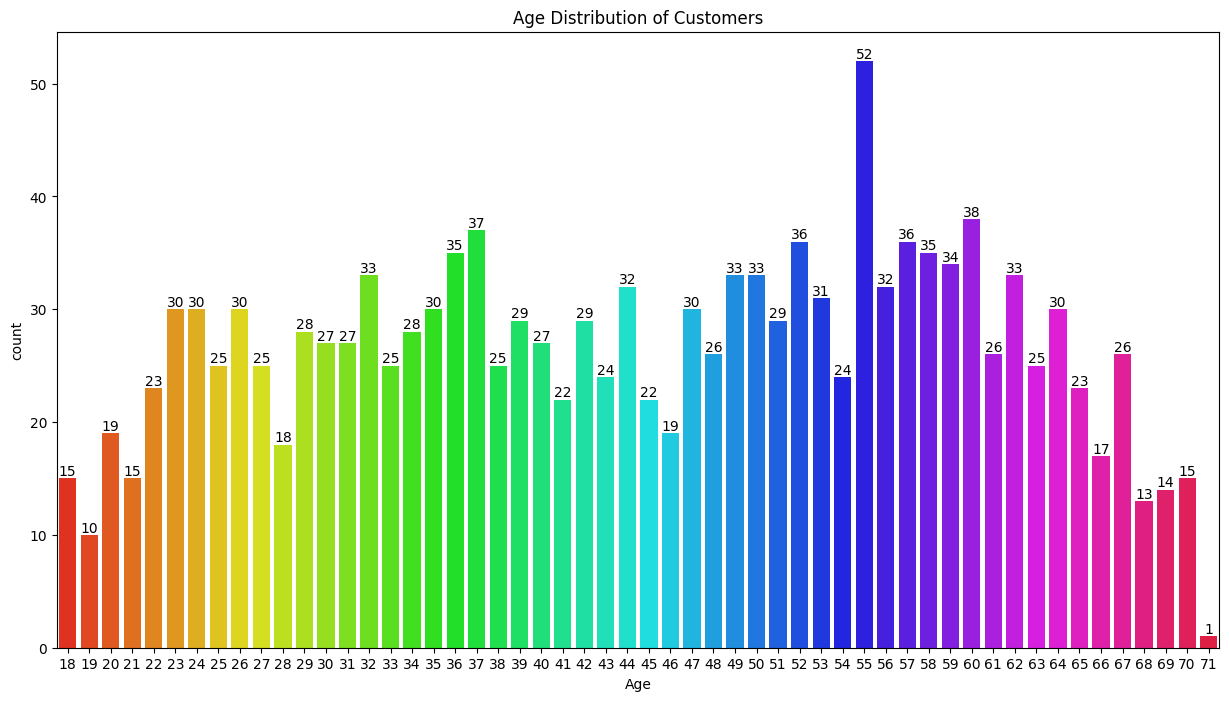

In [19]:
plt.rcParams["figure.figsize"] = (15, 8)

#create a countplot for Age distribution
age_plot = sns.countplot(x = mcdonalds_data["Age"], palette = "hsv")

#add labels to the bars
for container in age_plot.containers:
    age_plot.bar_label(container)

plt.title("Age Distribution of Customers")
plt.show()

In [20]:
#checking Like values
mcdonalds_data["Like"].value_counts()

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

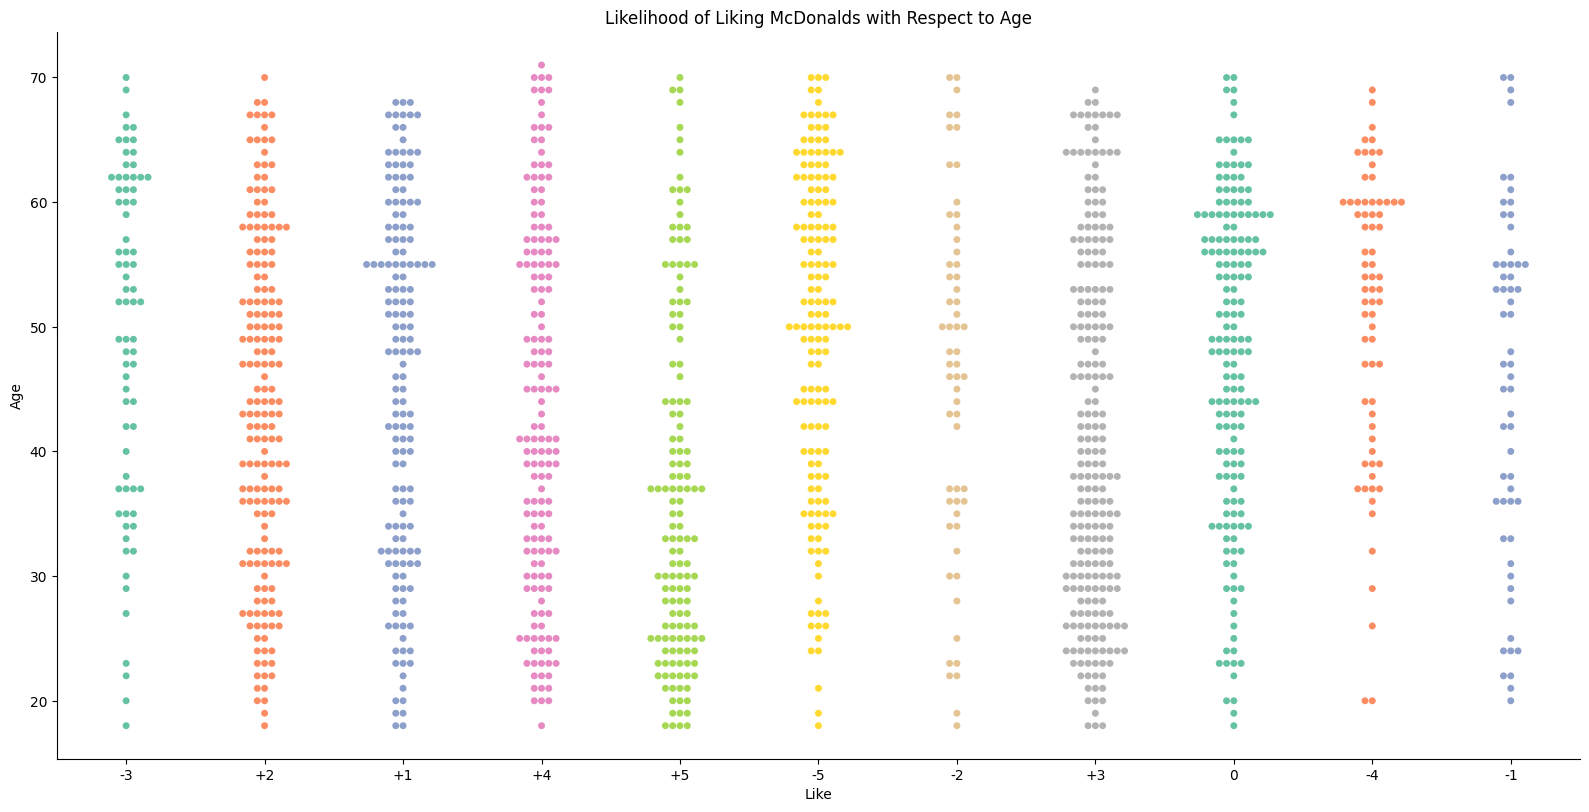

In [21]:
#rename the "Like" category for convenience
mcdonalds_data["Like"] = mcdonalds_data["Like"].replace({"I hate it!-5": "-5", "I love it!+5": "+5"})

#psychographic segmentation plot
sns.catplot(x = "Like", y = "Age", data = mcdonalds_data, orient = "v", height = 8, aspect = 2, palette = "Set2", kind = "swarm")

#set plot title
plt.title("Likelihood of Liking McDonalds with Respect to Age")
plt.show()

In [22]:
#checking expensive values
mcdonalds_data["expensive"].value_counts()

No     915
Yes    516
Name: expensive, dtype: int64

<Axes: xlabel='expensive', ylabel='count'>

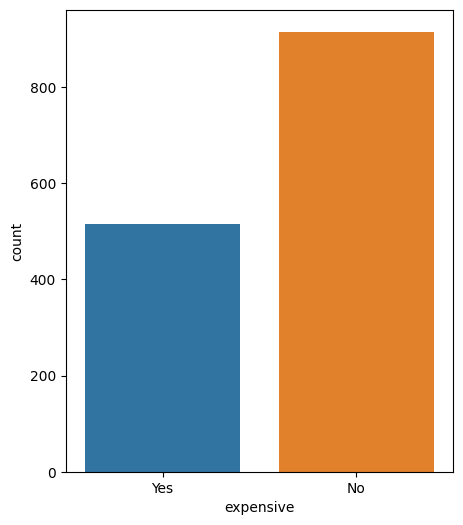

In [23]:
#plotting the expensive values
plt.figure(figsize = (5,6))
sns.countplot(x="expensive",data = mcdonalds_data)

In [24]:
#select the first 11 columns and convert "Yes" to 1, "No" to 0
MD_x = (mcdonalds_data.iloc[:, 0:11] == "Yes").astype(int)

#calculate and round the column means
col_means = np.round(MD_x.mean(), 2)

#display the results
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.10
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [25]:
#perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

#display the summary
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

summary_df = pd.DataFrame({
    "Standard Deviation": pca.singular_values_,
    "Proportion of Variance": explained_variance_ratio,
    "Cumulative Proportion": cumulative_explained_variance
}, index=[f"PC{i+1}" for i in range(len(explained_variance_ratio))])

print("Importance of components:")
print(summary_df)

Importance of components:
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1            28.663138                0.298991               0.298991
PC2            22.943087                0.191564               0.490554
PC3            19.094023                0.132680               0.623234
PC4            15.093165                0.082903               0.706137
PC5            12.807766                0.059698               0.765835
PC6            11.802390                0.050693               0.816528
PC7            11.033029                0.044300               0.860828
PC8            10.464314                0.039850               0.900678
PC9            10.104303                0.037155               0.937834
PC10            9.464867                0.032602               0.970435
PC11            9.013283                0.029565               1.000000


In [26]:
#print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(pca.singular_values_, 1))

# Print rotation matrix
print("Rotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(np.round(pca.components_, 3), index=MD_x.columns, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(rotation_matrix)

Standard deviations (1, .., p=11):
[28.7 22.9 19.1 15.1 12.8 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.474 -0.155 -0.007  0.116  0.304 -0.109 -0.341 -0.469  0.333   
convenient  0.371  0.017  0.019 -0.034 -0.058 -0.087 -0.607  0.312  0.599   
spicy      -0.301 -0.063 -0.039 -0.322 -0.803 -0.066 -0.156 -0.286  0.028   
fattening   0.054 -0.145  0.199 -0.349  0.245 -0.098  0.123 -0.007  0.069   
greasy     -0.308  0.277  0.074 -0.070  0.363  0.113 -0.127 -0.212 -0.000   
fast        0.170 -0.344 -0.353 -0.403  0.215 -0.599 -0.101 -0.079 -0.263   
cheap      -0.278 -0.060  0.707 -0.392  0.039 -0.085 -0.041  0.357 -0.068   
tasty       0.013 -0.108  0.381  0.591 -0.142 -0.625  0.141 -0.073  0.032   
expensive   0.574 -0.016  0.396 -0.160 -0.003  0.168  0.074 -0.640  0.064   
healthy    -0.108 -0.652 -0.079 -0.012  0.008  0.228  0.442  0.076  0.467   
disgusting  0.043 -0.561  0.140

In [27]:
#standardize the data
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

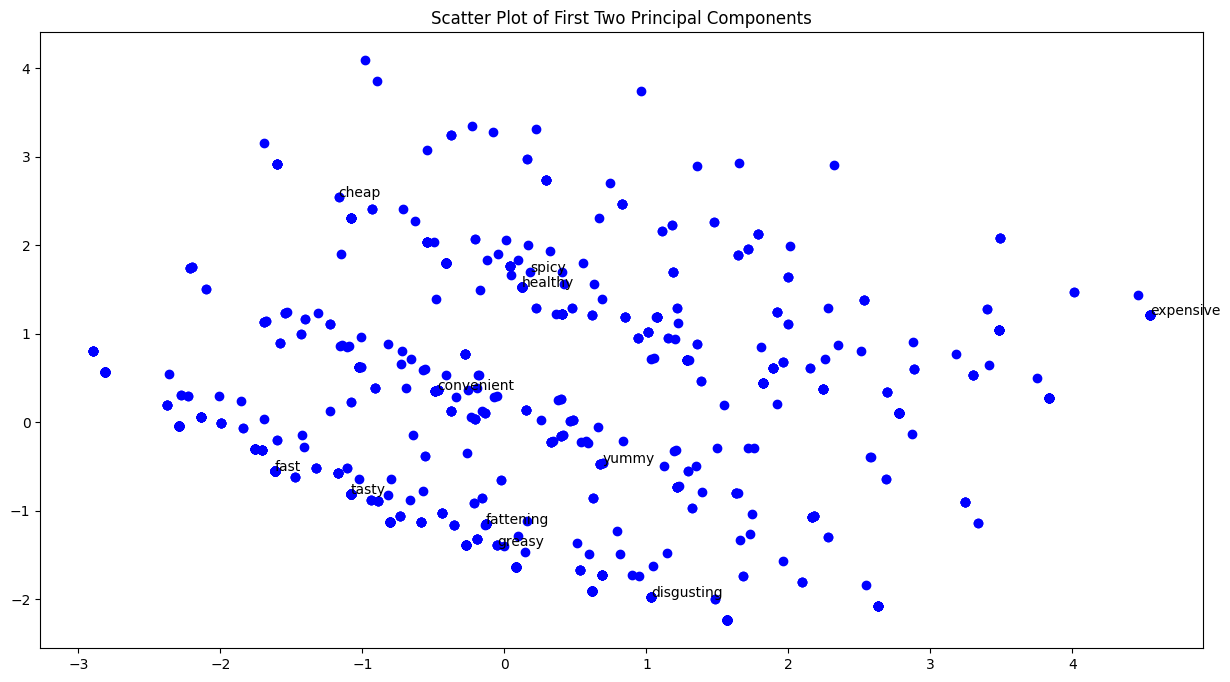

In [28]:
#perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_standardized)

#scatter plot of the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color = "blue")

#annotate the points with column names
for i, col_name in enumerate(MD_x.columns):
    plt.annotate(col_name, (MD_pca[i, 0], MD_pca[i, 1]))

plt.title("Scatter Plot of First Two Principal Components")
plt.show()

In [29]:
#perform KMeans clustering for 2 to 8 clusters
wcss = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

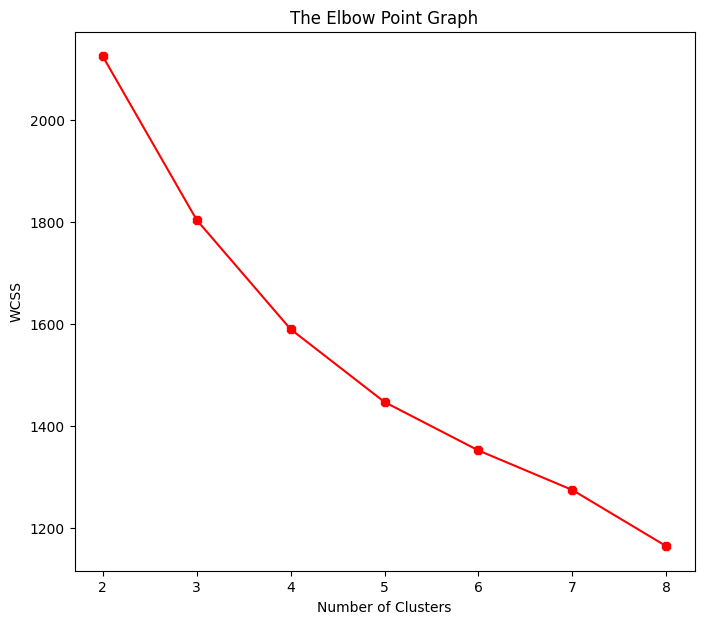

In [30]:
#plot the Elbow Graph
plt.figure(figsize = (8, 7))
plt.plot(range(2,9), wcss, marker = "8", color = "red")
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


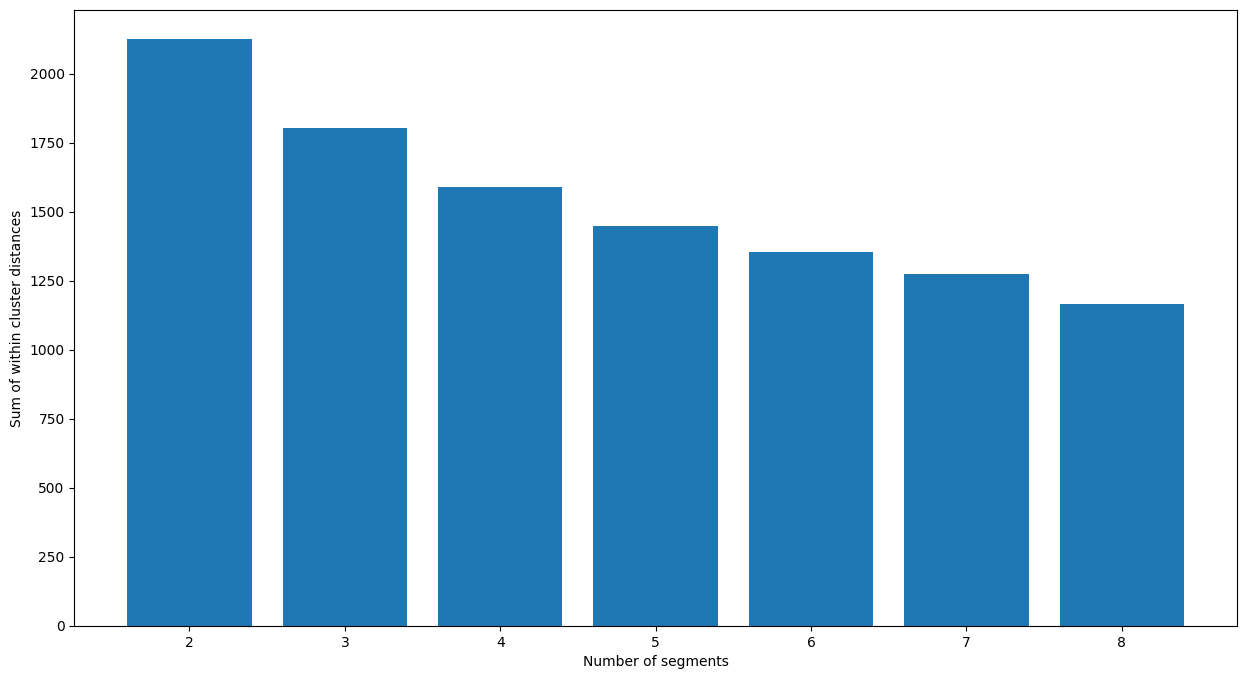

In [31]:
#plotting the bar graph
plt.bar(range(2, 9), wcss)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within cluster distances")
plt.show()

In [32]:
#kmeans with n_clusters=4
model_k4 = KMeans(n_clusters = 4, random_state=1234)
model_k4.fit(MD_x)

#cluster labels
k4 = model_k4.labels_


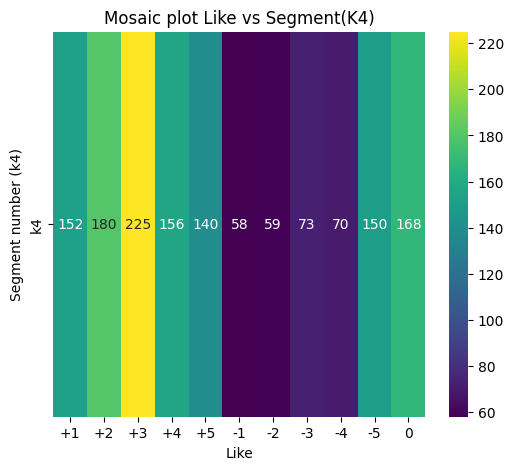

In [33]:
#cross-tabulation between k4 and the Like column
cross_tab_like = pd.crosstab("k4", mcdonalds_data["Like"])

#heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab_like, cmap = "viridis", annot = True, fmt = "d", cbar = True)
plt.xlabel("Like")
plt.ylabel("Segment number (k4)")
plt.title("Mosaic plot Like vs Segment(K4)")
plt.show()

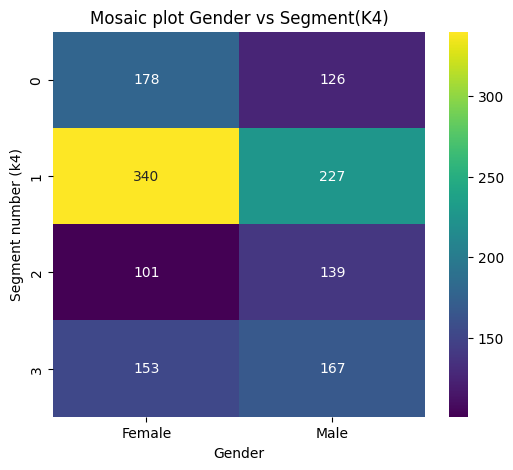

In [34]:
#cross-tabulation between k4 and the Gender column
cross_tab_gender = pd.crosstab(k4, mcdonalds_data["Gender"])
plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab_gender, cmap = "viridis", annot = True, fmt = "d", cbar = True)
plt.xlabel("Gender")
plt.ylabel("Segment number (k4)")
plt.title("Mosaic plot Gender vs Segment(K4)")
plt.show()

In [35]:
label_encoder = LabelEncoder()

#fit and transforming VisitFrequency column
mcdonalds_data["VisitFrequency_Encoded"] = label_encoder.fit_transform(mcdonalds_data["VisitFrequency"])

#mean of VisitFrequency for each cluster
visit = mcdonalds_data["VisitFrequency_Encoded"].groupby(k4).mean()
visit = visit.to_frame().reset_index()
visit

,index,VisitFrequency_Encoded
0,0,2.825658
1,1,2.578483
2,2,2.679167
3,3,2.543750


In [36]:
#fit and transforming Like column
mcdonalds_data["Like_Encoded"] = label_encoder.fit_transform(mcdonalds_data["Like"])

#mean of Like for each cluster
like = mcdonalds_data["Like_Encoded"].groupby(k4).mean()
like = like.to_frame().reset_index()
like

,index,Like_Encoded
0,0,6.151316
1,1,2.971781
2,2,7.445833
3,3,3.315625


In [37]:
#transform the GGender column to numeric labels
mcdonalds_data["Gender_Encoded"] = label_encoder.fit_transform(mcdonalds_data["Gender"])

#mean of the Gender column for each cluster
gender = mcdonalds_data["Gender_Encoded"].groupby(k4).mean()
gender = gender.to_frame().reset_index()
gender

,index,Gender_Encoded
0,0,0.414474
1,1,0.400353
2,2,0.579167
3,3,0.521875


In [38]:
#creating a binary column for Female
mcdonalds_data["Female_binary"] = (mcdonalds_data["Gender"] == "Female").astype(int)

#mean of the binary Female column for each cluster
female = mcdonalds_data.groupby(k4)["Female_binary"].mean()
female = female.to_frame().reset_index()
female

,index,Female_binary
0,0,0.585526
1,1,0.599647
2,2,0.420833
3,3,0.478125


In [39]:
#creating a binary column for Male
mcdonalds_data["Male_binary"] = (mcdonalds_data["Gender"] == "Male").astype(int)

#mean of the binary Male column for each cluster
male = mcdonalds_data.groupby(k4)["Male_binary"].mean()
male = male.to_frame().reset_index()
male

,index,Male_binary
0,0,0.414474
1,1,0.400353
2,2,0.579167
3,3,0.521875


In [40]:
segment = gender.merge(like, on = "index", how = "left").merge(visit, on = "index", how = "left")
segment

,index,Gender_Encoded,Like_Encoded,VisitFrequency_Encoded
0,0,0.414474,6.151316,2.825658
1,1,0.400353,2.971781,2.578483
2,2,0.579167,7.445833,2.679167
3,3,0.521875,3.315625,2.543750


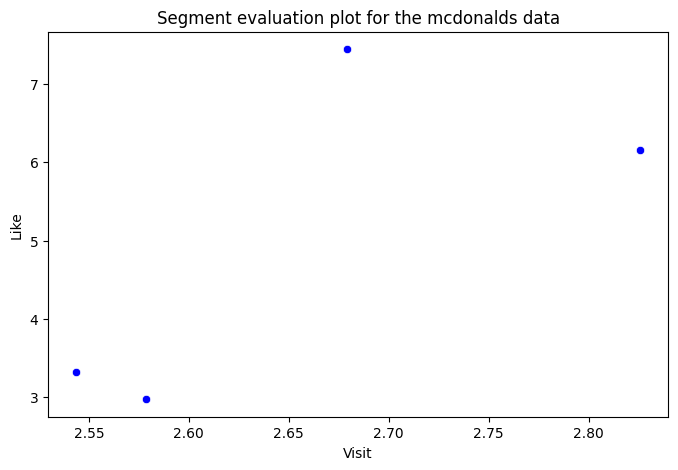

In [41]:
#target
plt.figure(figsize=(8, 5))

#scatter plot
sns.scatterplot(x = "VisitFrequency_Encoded", y = "Like_Encoded", data = segment, color = "blue")

#plot title and labels
plt.title("Segment evaluation plot for the mcdonalds data")
plt.xlabel("Visit")
plt.ylabel("Like")
plt.show()

**Report T1**<br>
**Submitted By - Sobhan Maity**<br>
**Batch-SB-23-11-1**
